# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy as owm
import urllib
import csv

# Import API key
from api_keys import api_key

#use time.sleep(5) for pausing between API requests so that we don't overload processes

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#The code above will pick 1500 random latitude and 1500 random longitude coordinates 
#between the defined ranges and the closest city using numpy randomizer.  Distinct cities
#will be added to the list based on the (if city not in cities) condition.

#Just checking the output of lat/lng zip to understand data
#lat_lngs_df = pd.DataFrame(list(zip(lats, lngs)))
#lat_lngs_df

print(len(cities))

622


In [18]:
#Define base URL, units, and a query URL that adds on the API key and unit of measure.
#city added to URL later when looping through city list
url = "http://api.openweathermap.org/data/2.5/weather?"
#I use imperial for charting purposes.  There is a greater variance in numbers which should
#illustrate a more meaningful chart - also, I understand F better than C (temp)
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

#test output of JSON city requests
#print 3 results just for a preview
#use time.sleep() to pause between requests
counter = 0
for city in cities:
    response = requests.get(query_url + city).json()
    pprint(response)
    counter += 1
    time.sleep(1)
    if counter == 3:
        break

#I noticeded that there is a "city not found" error 
#{'cod': '404', 'message': 'city not found'}

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 3.07, 'lon': 172.79},
 'dt': 1537595305,
 'id': 2110227,
 'main': {'grnd_level': 1022.17,
          'humidity': 100,
          'pressure': 1022.17,
          'sea_level': 1022.21,
          'temp': 85.91,
          'temp_max': 85.91,
          'temp_min': 85.91},
 'name': 'Butaritari',
 'sys': {'country': 'KI',
         'message': 0.003,
         'sunrise': 1537553900,
         'sunset': 1537597498},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270.006, 'speed': 7.74}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 30.44, 'lon': -86.61},
 'dt': 1537594560,
 'id': 4166723,
 'main': {'humidity': 100,
          'pressure': 1018,
          'temp': 75.25,
          'temp_max': 78.98,
          'temp_min': 71.96},
 'name': 'Ocean City',
 'sys': {'country': 'US',
         'id': 735,
         

In [19]:
#preview of constructed query URL + city
#URL = OK
print(query_url + city)

http://api.openweathermap.org/data/2.5/weather?appid=0c7809d55303f1644e7ea61b6ed8ea9c&units=Imperial&q=hermanus


In [20]:
#!!!WARNING!!! RUNNING THIS BLOCK TAKES A LONG TIME

#prepare empty list to hold city info values
city_data = []

#for printing counts
limit = 0
set_var = 1
item_var = 1

##Perform API Calls
##Perform a weather check on each city using a series of successive API calls.
##Include a print log of each city as it'sbeing processed (with the city number and city name).

#loop through cities to extract information about all the ~500 random cities
#impose try/except for anomalies
for city in cities:
    try:
        # add city to query URL to get JSON data as tested above
        response = requests.get(query_url + city).json()
        city_name = response["name"]
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temperature": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        if item_var < 51:
            print(f'{city} (Set: {set_var}, Item: {item_var})') 
            item_var += 1
        else:
            set_var += 1
            item_var = 1
        time.sleep(1)
    # If city not found, skip to next record
    except:
        print(f'****{city} not found.  Skipping...')
    limit += 1
    if limit == 600:
        break

butaritari (Set: 1, Item: 1)
ocean city (Set: 1, Item: 2)
hermanus (Set: 1, Item: 3)
port-gentil (Set: 1, Item: 4)
sitka (Set: 1, Item: 5)
tiznit (Set: 1, Item: 6)
vaini (Set: 1, Item: 7)
****belushya guba not found.  Skipping...
bang saphan (Set: 1, Item: 8)
gat (Set: 1, Item: 9)
busselton (Set: 1, Item: 10)
nabire (Set: 1, Item: 11)
saint-philippe (Set: 1, Item: 12)
rikitea (Set: 1, Item: 13)
atuona (Set: 1, Item: 14)
ushuaia (Set: 1, Item: 15)
beloha (Set: 1, Item: 16)
punta arenas (Set: 1, Item: 17)
grand gaube (Set: 1, Item: 18)
magadan (Set: 1, Item: 19)
bluff (Set: 1, Item: 20)
****vaitupu not found.  Skipping...
severo-kurilsk (Set: 1, Item: 21)
clyde river (Set: 1, Item: 22)
la maddalena (Set: 1, Item: 23)
mahebourg (Set: 1, Item: 24)
san quintin (Set: 1, Item: 25)
celestun (Set: 1, Item: 26)
ambovombe (Set: 1, Item: 27)
chadiza (Set: 1, Item: 28)
****illoqqortoormiut not found.  Skipping...
albany (Set: 1, Item: 29)
guarapari (Set: 1, Item: 30)
grenfell (Set: 1, Item: 31)
kat

remanso (Set: 6, Item: 7)
bilibino (Set: 6, Item: 8)
ntcheu (Set: 6, Item: 9)
dingle (Set: 6, Item: 10)
jutai (Set: 6, Item: 11)
ilulissat (Set: 6, Item: 12)
juneau (Set: 6, Item: 13)
mount gambier (Set: 6, Item: 14)
walvis bay (Set: 6, Item: 15)
kindu (Set: 6, Item: 16)
ambulu (Set: 6, Item: 17)
balikpapan (Set: 6, Item: 18)
bumba (Set: 6, Item: 19)
baykit (Set: 6, Item: 20)
coripata (Set: 6, Item: 21)
****svetlyy not found.  Skipping...
****samalaeulu not found.  Skipping...
portree (Set: 6, Item: 22)
sangar (Set: 6, Item: 23)
hofn (Set: 6, Item: 24)
magway (Set: 6, Item: 25)
cabedelo (Set: 6, Item: 26)
veraval (Set: 6, Item: 27)
pamplona (Set: 6, Item: 28)
port moresby (Set: 6, Item: 29)
paamiut (Set: 6, Item: 30)
moose factory (Set: 6, Item: 31)
aktau (Set: 6, Item: 32)
****scottsburgh not found.  Skipping...
kholtoson (Set: 6, Item: 33)
mastung (Set: 6, Item: 34)
merauke (Set: 6, Item: 35)
bom jesus (Set: 6, Item: 36)
lompoc (Set: 6, Item: 37)
gberia fotombu (Set: 6, Item: 38)
cam

In [21]:
# Create CSV file
with open('output_data/cities.csv', 'w', newline='') as csvfile:
     fields = ['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
     writer = csv.DictWriter(csvfile, fieldnames=fields)
     writer.writeheader()
     for x in city_data:
         writer.writerow(x)
            
print(csvfile)

<_io.TextIOWrapper name='output_data/cities.csv' mode='w' encoding='cp1252'>


In [22]:
#read CSV and output to dataframe
cities_df = pd.read_csv("output_data/cities.csv")
cities_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,85.91,100,0,7.74,KI,1537595305
1,Ocean City,30.44,-86.61,78.98,100,1,3.15,US,1537594560
2,Hermanus,-34.42,19.24,42.44,93,0,2.93,ZA,1537595307
3,Port-Gentil,-0.72,8.78,77.00,94,90,10.29,GA,1537592400
4,Sitka,37.17,-99.65,52.16,81,0,7.18,US,1537595319


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

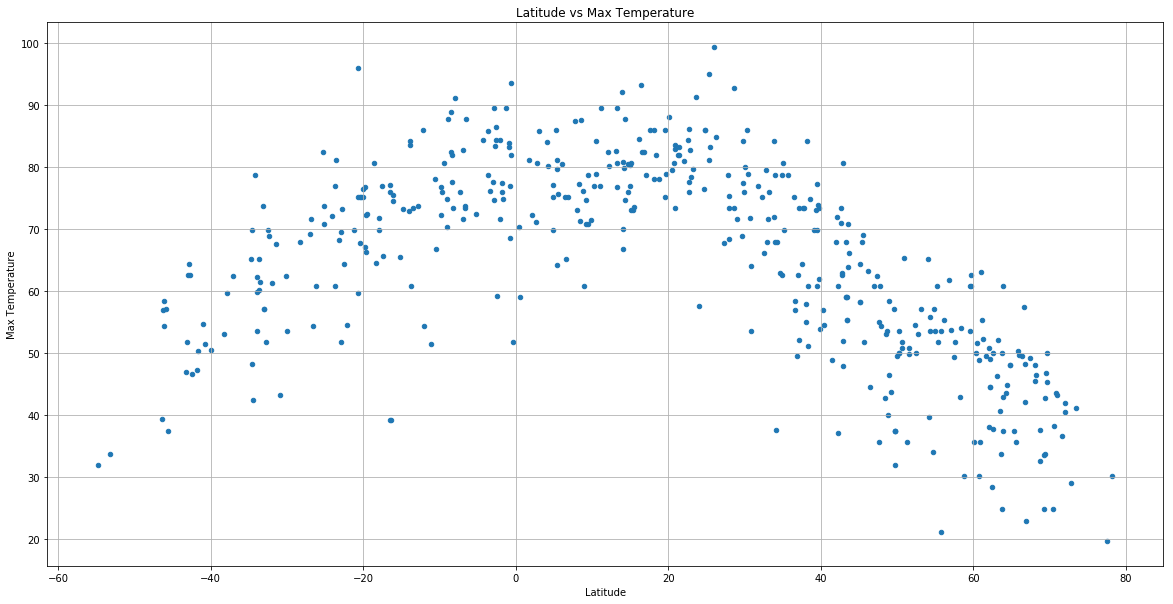

In [23]:
# Scatterplot: Latituded vs. Max Temperature
cities_df.plot(kind="scatter", 
               x="Latitude", 
               y="Max Temperature", 
               grid=True, 
               figsize=(20,10),
               title="Latitude vs Max Temperature")

plt.show()

#### Latitude vs. Humidity Plot

In [27]:
# Scatterplot: Latituded vs. Humidity
cities_df.plot(kind="scatter", 
               x="Latitude", 
               y="Humidity", 
               grid=True, 
               figsize=(20,10),
               title="Latitude vs Humidity"
              density=True)

plt.show()

SyntaxError: invalid syntax (<ipython-input-27-cf6cbbaec752>, line 8)

#### Latitude vs. Cloudiness Plot

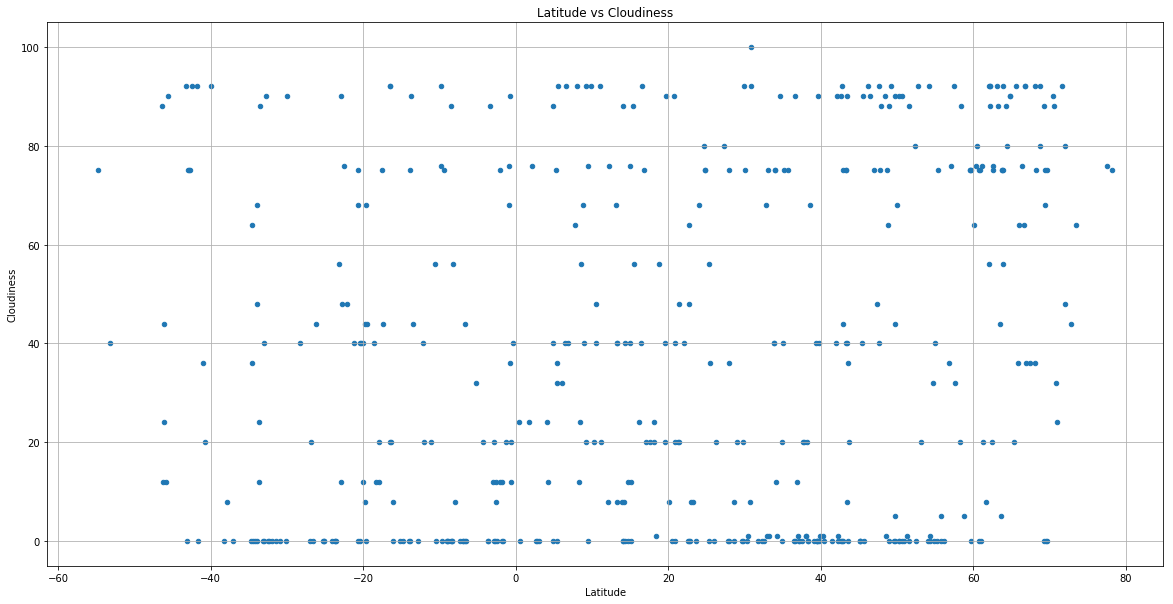

In [25]:
# Scatterplot: Latituded vs. Humidity
cities_df.plot(kind="scatter", 
               x="Latitude", 
               y="Cloudiness", 
               grid=True, 
               figsize=(20,10),
               title="Latitude vs Cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

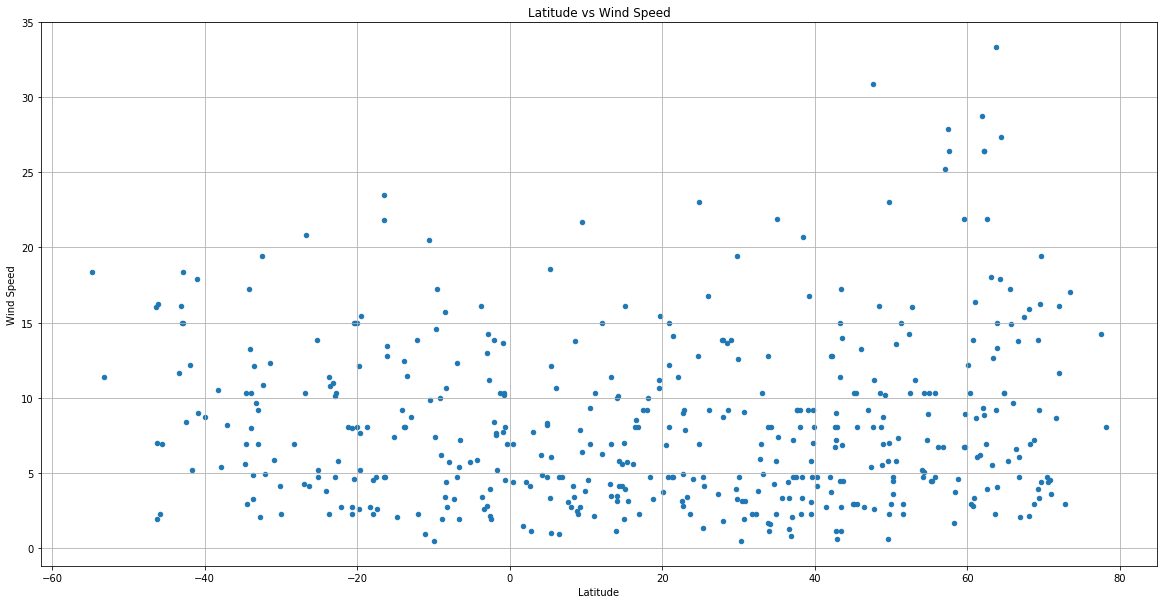

In [26]:
# Scatterplot: Latituded vs. Humidity
cities_df.plot(kind="scatter", 
               x="Latitude", 
               y="Wind Speed", 
               grid=True, 
               figsize=(20,10),
               title="Latitude vs Wind Speed")
plt.show()